In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyarrow import csv
import boost_histogram as bh
from lmfit.models import *
import matplotlib.pyplot as plt

from nicks_plot_utils import *


center_phi = {
    1: -90,
    2: -30,
    3: +30,
    4: +90,
    5: +150,
    6: -150,
  }


In [2]:
file_name = "/Users/tylern/Data/fid_cuts_pip_mc.csv"
pyTable = csv.read_csv(file_name,read_options=csv.ReadOptions(use_threads=True))
df = pyTable.to_pandas(strings_to_categorical=True)

In [3]:
df.head()

,e_sector,e_p,e_theta,e_phi,pip_sector,pip_p,pip_theta,pip_phi
0,3,2.745401,0.474161,-0.654494,6,0.297478,1.152310,2.477253
1,2,2.775371,0.401588,0.604071,4,1.446510,0.529184,-1.960029
2,5,2.758056,0.446949,-2.727287,2,0.753967,1.037717,0.551460
3,1,3.014385,0.359245,1.686125,4,1.486608,0.535280,-1.240842
4,2,2.653814,0.326962,0.520782,5,1.978571,0.463734,-2.915849


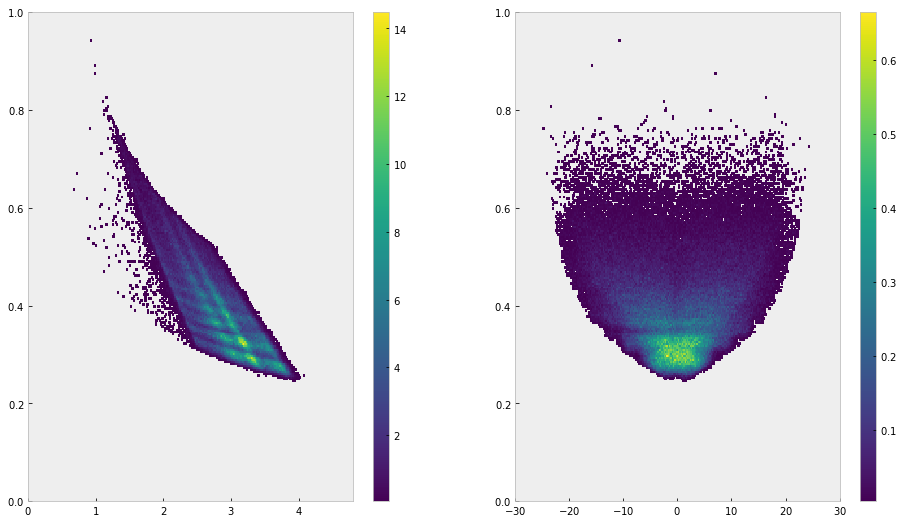

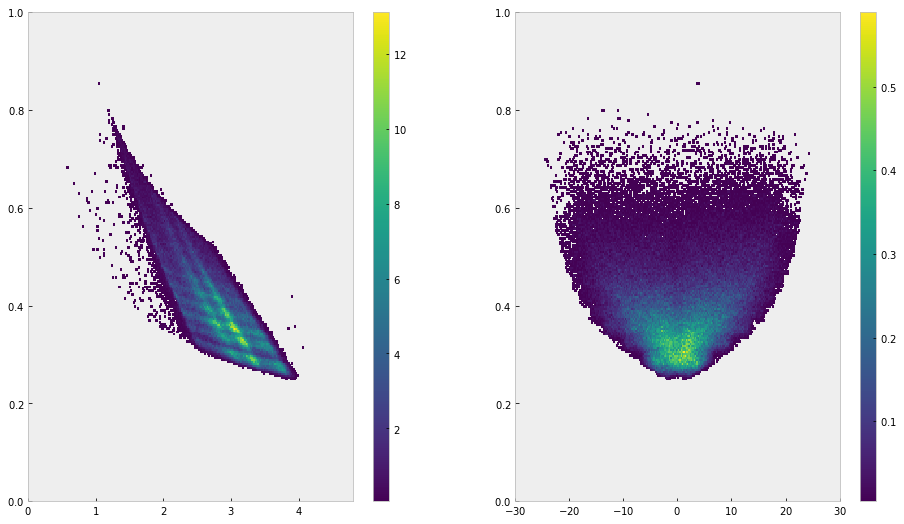

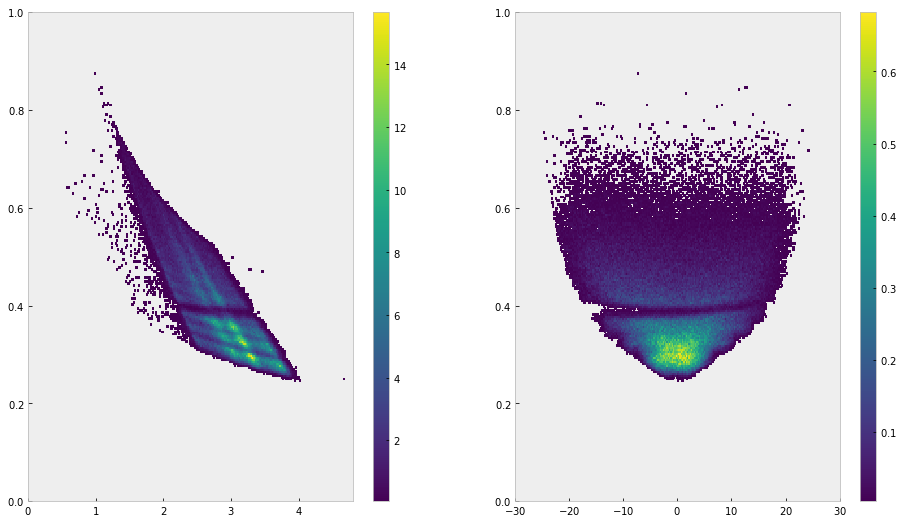

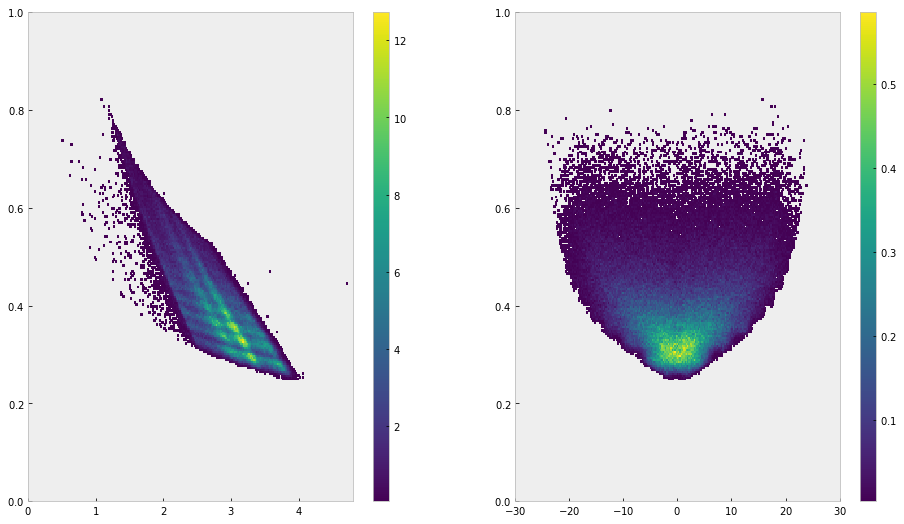

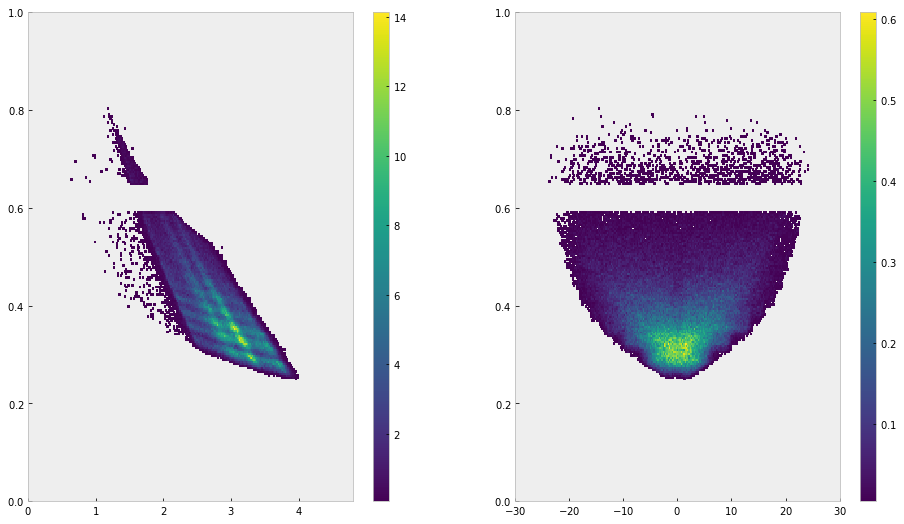

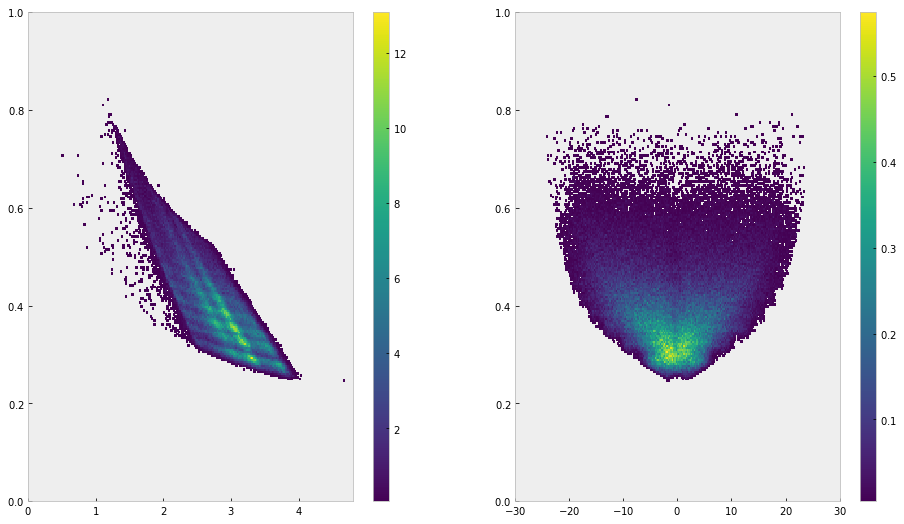

In [8]:
for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
    _df = df[df.e_sector == sec]
    eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,1])
    eptheta.plot(ax[0], zeros=False)
    
    epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                        xbins=250, ybins=250, xrange=[-30,30], yrange=[0,1])
    epphitheta.plot(ax[1], zeros=False)
    plt.show()

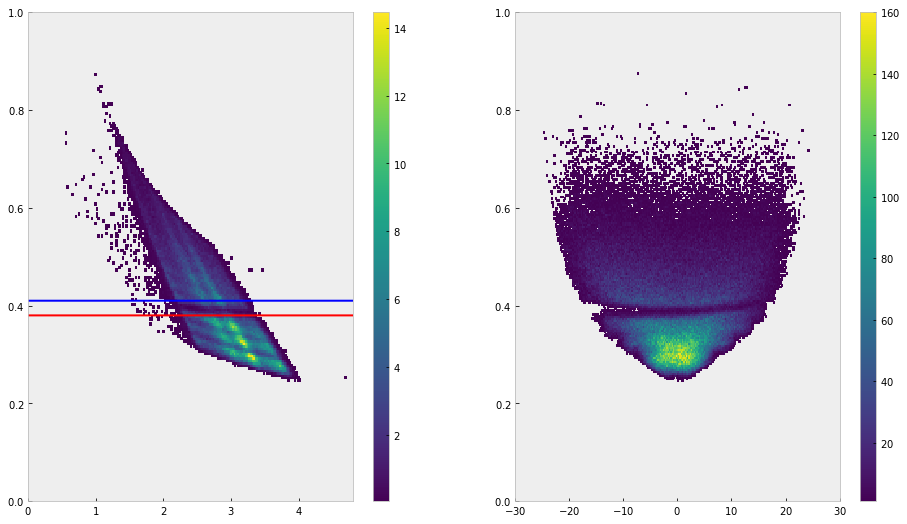

In [18]:
def cut_line(xs, a, b, c, d):
    return a*xs**2 + b*xs + c 

sec = 3
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
_df = df[df.e_sector == sec]

ps = np.linspace(0.001, 4.8, len(_df))

pa=0
pb=0
pc=0.41
pd=0
ax[0].plot(ps,cut_line(ps,pa,pb,pc,pd), c='b')

ma=0
mb=0
mc=0.38
md=0
ax[0].plot(ps, cut_line(ps,ma,mb,mc,md), c='r')

cut = ~(~(_df.e_theta < cut_line(ps,pa,pb,pc,pd)) & ~(_df.e_theta > cut_line(ps,ma,mb,mc,md)))

#_df = _df[cut]


eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=200, ybins=200, xrange=[0,4.8], yrange=[0,1])
eptheta.plot(ax[0], zeros=False)

epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,1])
epphitheta.plot(ax[1], density=False, zeros=False)
plt.show()


plt.show()